In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [5]:
remover = df.columns[df.isnull().sum()/df.shape[0] > 0.1]
df = df.drop(remover, axis=1)
df = df.drop('Id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

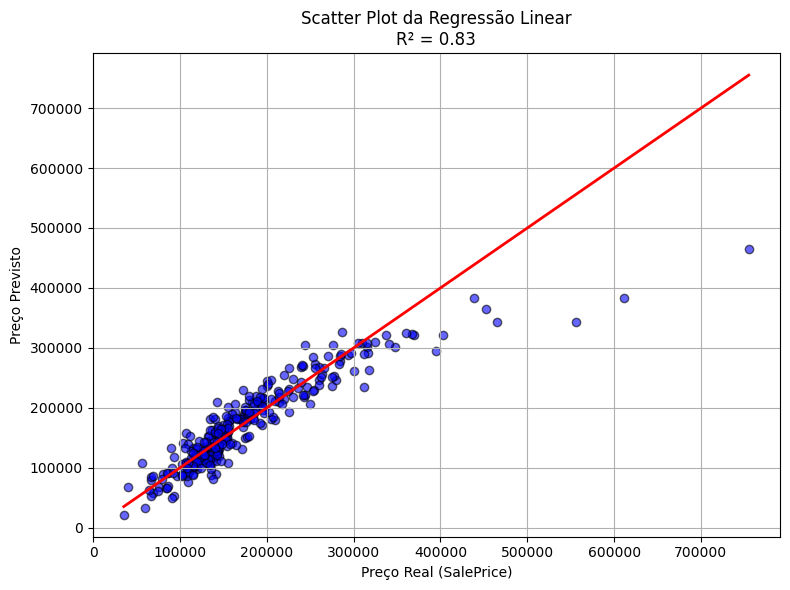

In [6]:
df_numeros = df.select_dtypes(include=['int64', 'float64'])
df_numeros.dropna()
df_numeros = df_numeros.fillna(-1)


X = df_numeros.drop(columns=['SalePrice'])
y = df_numeros['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse_all_numeric = np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Preço Real (SalePrice)')
plt.ylabel('Preço Previsto')
plt.title(f'Scatter Plot da Regressão Linear\nR² = {r2_score(y_test, y_pred):.2f}')
plt.grid(True)
plt.tight_layout()
plt.show()

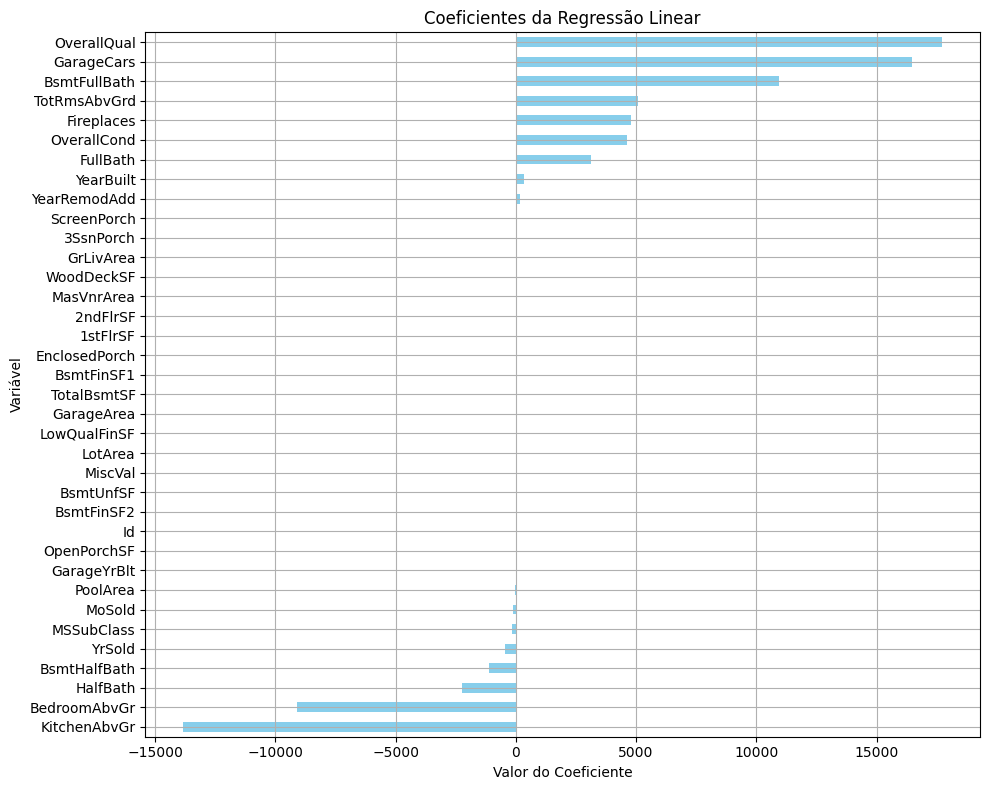

In [10]:
coefficients = pd.Series(model.coef_, index=X.columns).sort_values()

# Gráfico
plt.figure(figsize=(10, 8))
coefficients.plot(kind='barh', color='skyblue')
plt.title('Coeficientes da Regressão Linear')
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Variável')
plt.grid(True)
plt.tight_layout()
plt.show()

Acurácia: 0.9383561643835616
Matriz de confusão:
 [[151  10]
 [  8 123]]
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       161
           1       0.92      0.94      0.93       131

    accuracy                           0.94       292
   macro avg       0.94      0.94      0.94       292
weighted avg       0.94      0.94      0.94       292



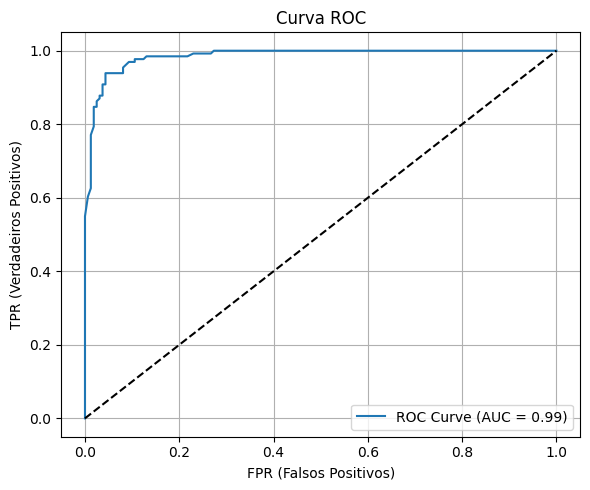

In [12]:
median_price = df_numeros['SalePrice'].median()
df_numeros['SaleCategory'] = (df_numeros['SalePrice'] >= median_price).astype(int)

X = df_numeros.drop(columns=['SalePrice', 'SaleCategory'])
y = df_numeros['SaleCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR (Falsos Positivos)')
plt.ylabel('TPR (Verdadeiros Positivos)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-31-3fbc5b849710>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_numeric_clean['SaleCategory'] = (full_numeric_clean['SalePrice'] >= median_price).astype(int)


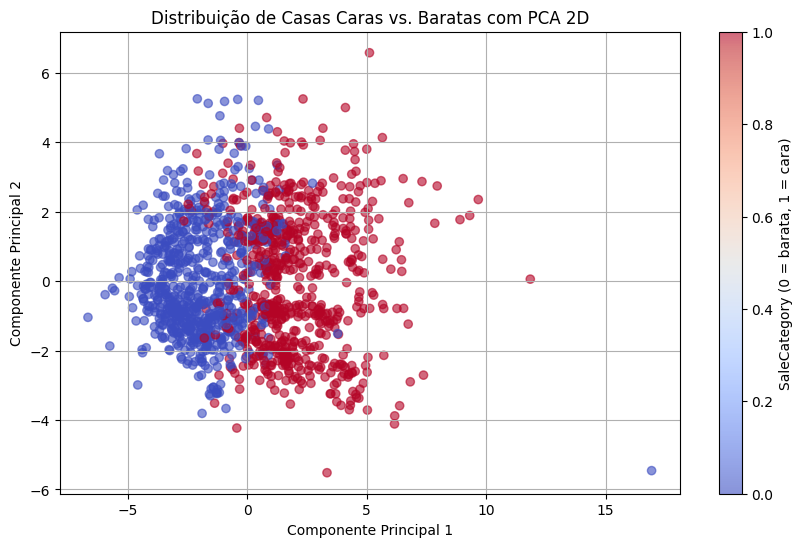

In [31]:
full_numeric = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'])
full_numeric_clean = full_numeric.dropna()

median_price = full_numeric_clean['SalePrice'].median()
full_numeric_clean['SaleCategory'] = (full_numeric_clean['SalePrice'] >= median_price).astype(int)

X_class = full_numeric_clean.drop(columns=['SalePrice', 'SaleCategory'])
y_class = full_numeric_clean['SaleCategory']

scaled_X_class = StandardScaler().fit_transform(X_class)

kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(scaled_X_class)

clustered_class_df = full_numeric_clean.copy()
clustered_class_df['Cluster'] = clusters_2

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_X_class)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y_class, cmap='coolwarm', alpha=0.6)
plt.title('Distribuição de Casas Caras vs. Baratas com PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.colorbar(label='SaleCategory (0 = barata, 1 = cara)')
plt.show()

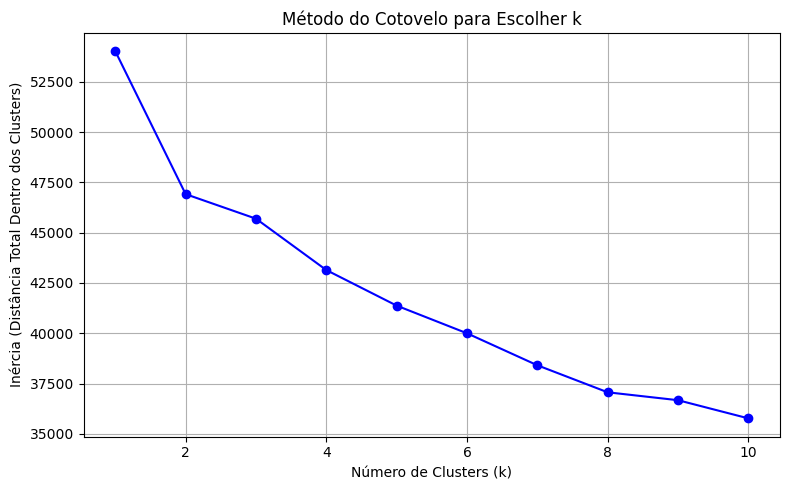

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerico)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Distância Total Dentro dos Clusters)')
plt.title('Método do Cotovelo para Escolher k')
plt.grid(True)
plt.tight_layout()
plt.show()

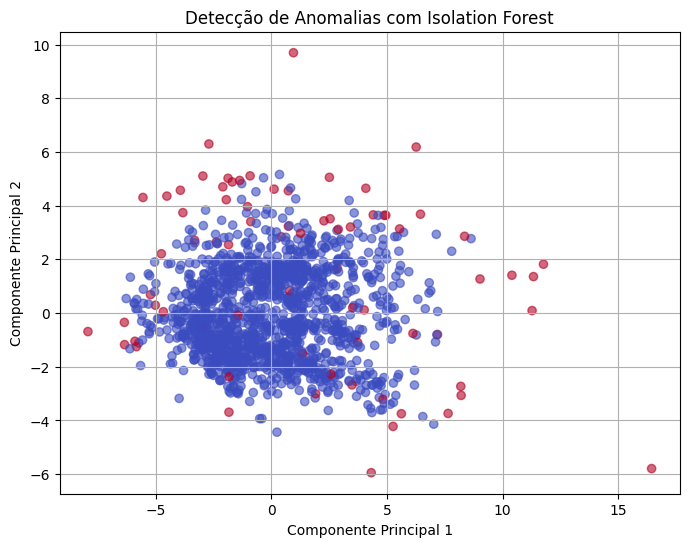

Número de anomalias detectadas: 73


In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerico)

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

anomalias = iso_forest.predict(X_scaled)

df['Anomalia'] = anomalias

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=anomalias, cmap='coolwarm_r', alpha=0.6)
plt.title('Detecção de Anomalias com Isolation Forest')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

print("Número de anomalias detectadas:", sum(anomalias == -1))

#as anomalias estao em vermelho